In [1]:
import pandas as pd
seoul = pd.read_csv('./서울시 주민등록인구 (연령별구별) 통계.csv',encoding='cp949') #데이터를 불러온다
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29832 entries, 0 to 29831
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동별      29832 non-null  object
 1   연령별     29832 non-null  object
 2   항목      29832 non-null  object
 3   2022 년  29832 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 932.4+ KB


In [2]:
seoul = seoul[seoul['동별'].str.contains('동')]
seoul = seoul[seoul.연령별 != '계']# 특정 조건 만족하는 행 삭제하기
seoul = seoul[seoul.항목 != '계']# 특정 조건 만족하는 행 삭제하기
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18060 entries, 136 to 29831
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동별      18060 non-null  object
 1   연령별     18060 non-null  object
 2   항목      18060 non-null  object
 3   2022 년  18060 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 705.5+ KB


In [3]:
subway2 = ['삼성동','역삼동','신림동','봉천동','화양동','구의동','구로동','신도림동','사당동',
           '신대방동','서교동','동교동','노고산동','염리동','아현동','충현동','서초동','방배동','하왕십리동',
           '행당동','성수동','신천동','잠실동','문래동','당산동','서소문동','을지로동','명동동','광희동','신당동']
for i in range(len(subway2)):
    j = len(subway2[i])
    subway2[i] = subway2[i][:j-1]
print(subway2)
print(len(subway2))

['삼성', '역삼', '신림', '봉천', '화양', '구의', '구로', '신도림', '사당', '신대방', '서교', '동교', '노고산', '염리', '아현', '충현', '서초', '방배', '하왕십리', '행당', '성수', '신천', '잠실', '문래', '당산', '서소문', '을지로', '명동', '광희', '신당']
30


In [4]:
hihi = "|".join(subway2)
new_seoul = seoul[seoul['동별'].str.contains(hihi, na = False)]
new_seoul.info()
foregin_seoul = new_seoul[new_seoul.항목 == '외국인']# 특정 조건 만족하는 행 삭제하기
korean_seoul = new_seoul[new_seoul.항목 == '한국인']# 특정 조건 만족하는 행 삭제하기
new_seoul

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 1456 to 28379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동별      2394 non-null   object
 1   연령별     2394 non-null   object
 2   항목      2394 non-null   object
 3   2022 년  2394 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 93.5+ KB


,동별,연령별,항목,2022 년
1456,명동,0~4세,한국인,35
1457,명동,0~4세,외국인,11
1459,명동,5~9세,한국인,43
1460,명동,5~9세,외국인,37
1462,명동,10~14세,한국인,53
...,...,...,...,...
28373,잠실3동,90~94세,외국인,0
28375,잠실3동,95~99세,한국인,26
28376,잠실3동,95~99세,외국인,0
28378,잠실3동,100세 이상,한국인,1


In [5]:
foregin_seoul

,동별,연령별,항목,2022 년
1457,명동,0~4세,외국인,11
1460,명동,5~9세,외국인,37
1463,명동,10~14세,외국인,21
1466,명동,15~19세,외국인,21
1469,명동,20~24세,외국인,120
...,...,...,...,...
28367,잠실3동,80~84세,외국인,0
28370,잠실3동,85~89세,외국인,0
28373,잠실3동,90~94세,외국인,0
28376,잠실3동,95~99세,외국인,0


In [6]:
korean_seoul.to_csv('서울한국인.csv')
foregin_seoul.to_csv('서울외국인.csv')

In [7]:
# guro4dong=foregin_seoul.loc[foregin_seoul['동별']=='구로4동']
# guro4dong.head()

In [8]:
# guro4dong['2022 년'].sum()

In [9]:
# guro4dongkr=korean_seoul.loc[korean_seoul['동별']=='구로4동']
# guro4dongkr.head()
# guro4dongkr['2022 년'].sum()

In [10]:
# gamsil3dong=foregin_seoul.loc[foregin_seoul['동별']=='잠실3동']
# gamsil3dongkr = korean_seoul.loc[korean_seoul['동별']=='잠실3동']
# print(gamsil3dong['2022 년'].sum())
# print(gamsil3dongkr['2022 년'].sum())
# print(gamsil3dong['2022 년'].sum()/gamsil3dongkr['2022 년'].sum()*100)
# print(guro4dong['2022 년'].sum()/guro4dongkr['2022 년'].sum()*100)

57


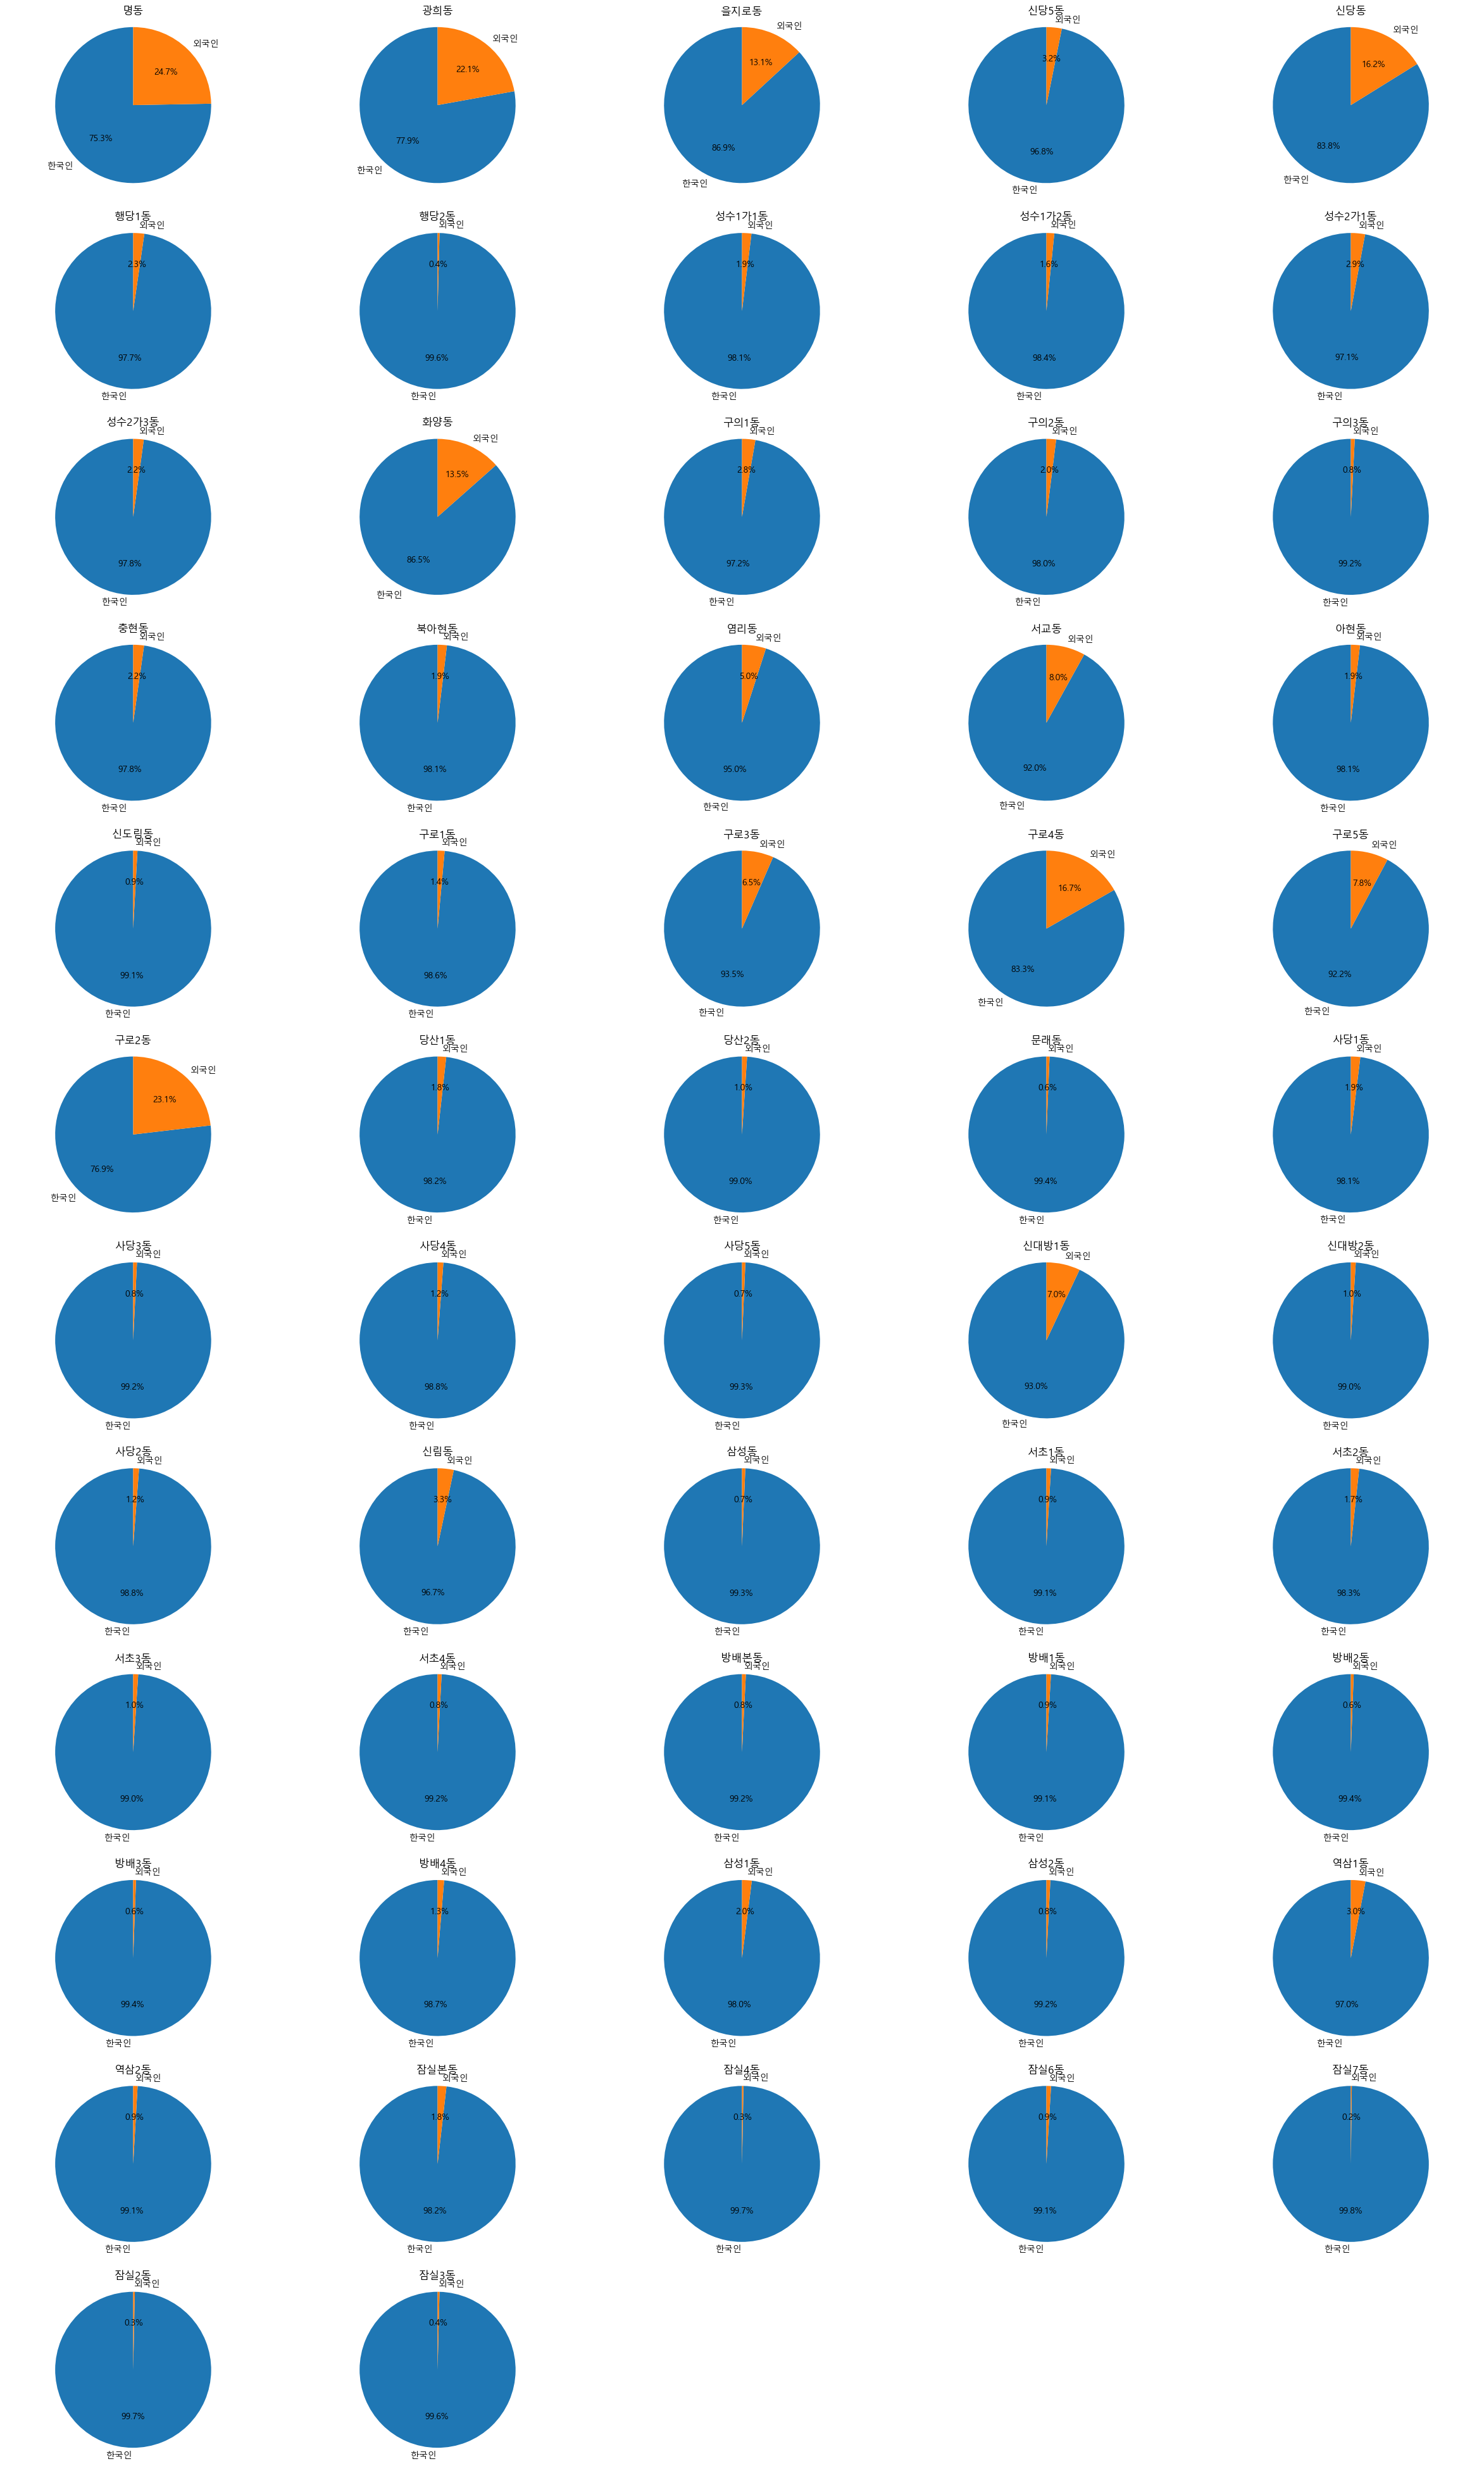

In [12]:
dong_list = new_seoul['동별'].unique() # '동별' 컬럼의 고유한 값 가져오기
print(len(dong_list))
import matplotlib.pyplot as plt
plt.style.use('default') # 스타일 서식 지정
plt.rc('font', family='Malgun Gothic')# 한글 폰트 지정
# 한국인과 외국인의 비율 계산
korean_count_list = []
foreigner_count_list = []

for dong in dong_list:
    korean_count = korean_seoul[korean_seoul['동별'] == dong]['2022 년'].sum()
    foreigner_count = foregin_seoul[foregin_seoul['동별'] == dong]['2022 년'].sum()

    korean_count_list.append(korean_count)
    foreigner_count_list.append(foreigner_count)

plt.figure(figsize=(30, 50))

for i in range(len(dong_list)):
    plt.subplot(12, 5, i+1)
    sizes = [korean_count_list[i], foreigner_count_list[i]]
    labels = ['한국인', '외국인']

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Make the pie chart circular
    plt.title(dong_list[i])

plt.show()

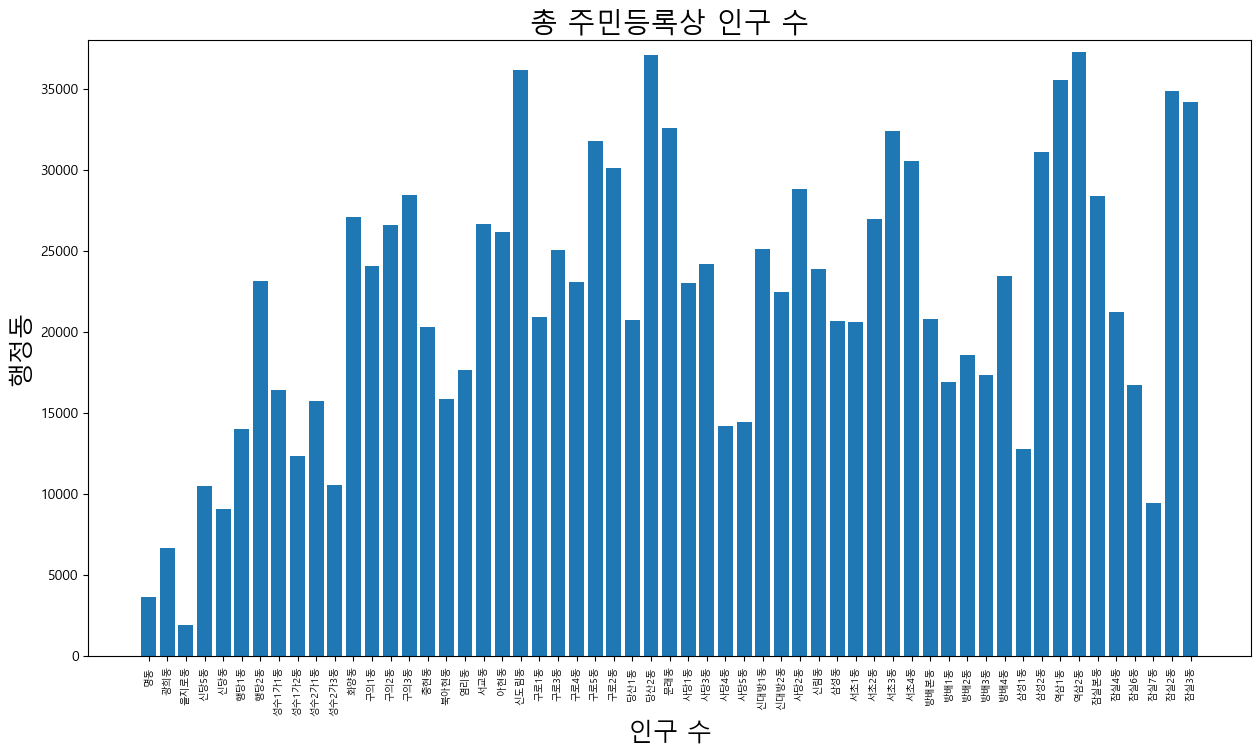

In [18]:
import numpy as np
total_count=[]
for i in range(len(dong_list)):
    total_count.append(korean_count_list[i]+foreigner_count_list[i])

x = np.arange(len(dong_list))
plt.figure(figsize=(15, 8))
plt.title('총 주민등록상 인구 수', fontsize=20)
plt.xlabel('인구 수', fontsize=18)
plt.ylabel('행정동', fontsize=18)
plt.ylim(0, 38000)
plt.bar(x, total_count)
plt.xticks(x, dong_list,fontsize=7, rotation = 90)
plt.show()

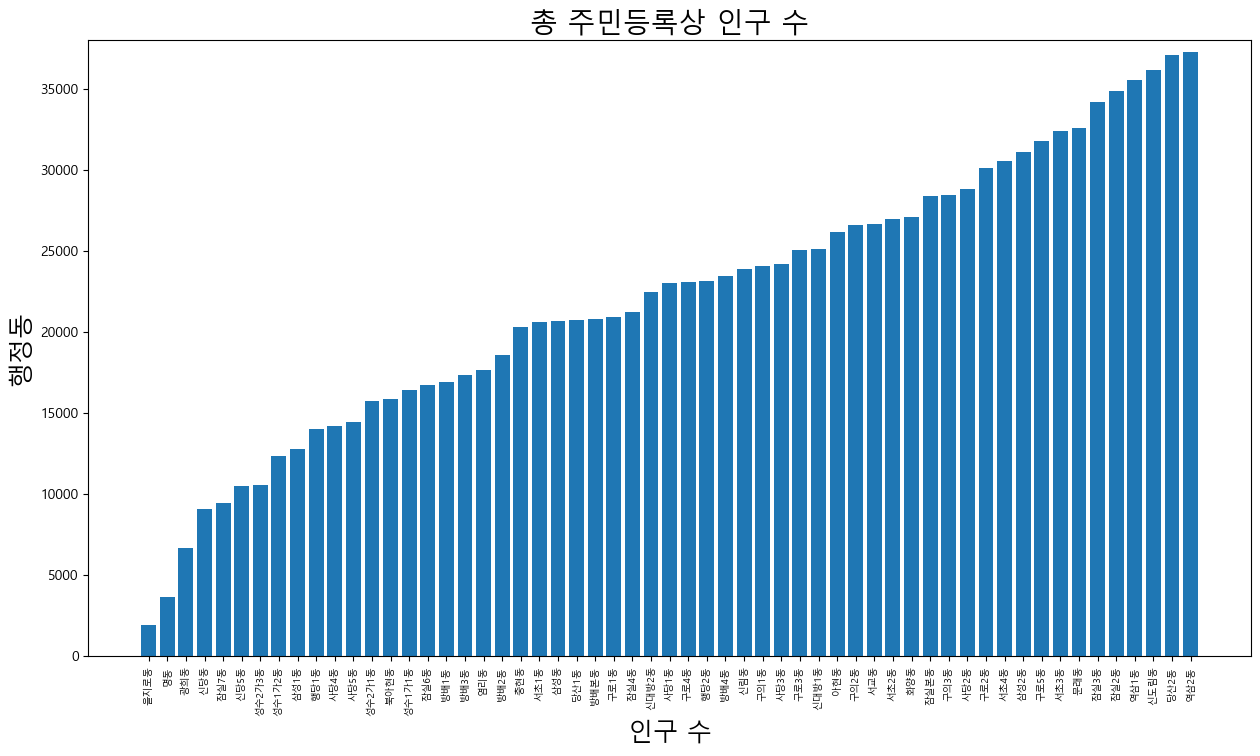

In [22]:
total_count_df = pd.DataFrame({'행정동':dong_list,'총인구수':total_count})
total_count_df=total_count_df.sort_values('총인구수')
x = np.arange(len(total_count_df))
plt.figure(figsize=(15, 8))
plt.title('총 주민등록상 인구 수', fontsize=20)
plt.xlabel('인구 수', fontsize=18)
plt.ylabel('행정동', fontsize=18)
plt.ylim(0, 38000)
plt.bar(x, total_count_df['총인구수'])
plt.xticks(x, total_count_df['행정동'],fontsize=7, rotation = 90)
plt.show()